# Imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import holidays
from statsmodels.formula.api import ols
import statsmodels.api as sm
from datetime import timedelta
from itertools import product

# Lendo Base

In [17]:
df = pd.read_excel('C:\\Users\\joaov\\OneDrive\\Área de Trabalho\\Python\\lev-challenge\\data\\raw\\PRODUCTIONS.xlsx')
df

,date,bank,product,production
0,2025-01-30,97,88011,42991.29
1,2025-04-07,185,91108,1540.97
2,2025-05-08,46,31043,11820.76
3,2025-02-05,46,77090,1308.11
4,2025-01-30,243,23237,4954.00
...,...,...,...,...
87363,2025-05-27,62,14910,2355.01
87364,2025-04-15,208,28475,8499.74
87365,2025-05-29,28,63829,59888.80
87366,2025-06-04,270,65281,315.08


In [6]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
df.sort_values(by=['date', 'bank', 'product'], inplace=True)

# EDA

## Info Básicas

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87368 entries, 0 to 87367
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        87368 non-null  datetime64[ns]
 1   bank        87368 non-null  int64         
 2   product     87368 non-null  int64         
 3   production  87368 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.7 MB


In [6]:
df.describe()

,date,bank,product,production
count,87368,87368.000000,87368.000000,8.736800e+04
mean,2025-05-15 20:24:35.798919424,150.485029,56816.404542,4.819659e+04
min,2025-01-01 00:00:00,2.000000,5.000000,-6.579374e+04
25%,2025-03-12 00:00:00,72.000000,24432.000000,1.653928e+03
50%,2025-05-16 00:00:00,132.000000,64104.000000,5.584370e+03
75%,2025-07-21 00:00:00,208.000000,87993.000000,2.009764e+04
max,2025-09-23 00:00:00,295.000000,137949.000000,2.210837e+07
std,NaN,82.228222,35441.778327,2.652941e+05


In [48]:
df.shape

(87368, 4)

### Range dos Dados

In [8]:
df['date'].min(), df['date'].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-09-23 00:00:00'))

### Granularidade

In [ ]:
df['bank'].nunique()

52

In [16]:
df['product'].nunique()

4803

### Missing Data

In [32]:
df[df['production'] < 0]

,date,bank,product,production
33899,2025-07-04,208,125684,-2163.62
37568,2025-02-18,262,87133,-23676.45
41195,2025-06-27,225,92634,-14975.85
85200,2025-08-04,225,92026,-8214.42
85438,2025-04-10,282,8398,-65793.74


In [49]:
df[df['production'] == 0]

,date,bank,product,production
24,2025-05-19,249,63942,0.0
107,2025-04-02,62,79074,0.0
118,2025-04-09,62,3139,0.0
136,2025-02-11,62,62578,0.0
170,2025-05-20,249,87423,0.0
...,...,...,...,...
87272,2025-08-05,282,11404,0.0
87277,2025-04-28,20,86884,0.0
87303,2025-07-18,97,29245,0.0
87344,2025-05-09,249,87184,0.0


## Análise de Volume de Produção

In [88]:
group_bank = df.groupby('bank').agg({'production': 'sum'}).sort_values(by='production', ascending=False).reset_index()
group_bank['percentual'] = group_bank['production'] / group_bank['production'].sum() * 100
group_bank

,bank,production,percentual
0,185,8.947790e+08,21.249422
1,28,8.071402e+08,19.168154
2,208,5.078655e+08,12.060909
3,290,3.358483e+08,7.975803
4,109,2.795081e+08,6.637825
5,132,2.254027e+08,5.352916
6,282,2.170110e+08,5.153627
7,53,1.327742e+08,3.153152
8,62,1.178583e+08,2.798927
9,97,8.132177e+07,1.931248


In [93]:
group_bank[group_bank['production']<=0]

,bank,production,percentual
51,146,0.0,0.0


**Existe um banco que não produziu nada ao longo do ano**

In [89]:
group_product = df.groupby('product').agg({'production': 'sum'}).sort_values(by='production', ascending=False).reset_index()
group_product['percentual'] = group_product['production'] / group_product['production'].sum() * 100
group_product

,product,production,percentual
0,7892,4.989760e+08,11.849800
1,29849,4.329596e+08,10.282027
2,63829,1.658877e+08,3.939539
3,24069,1.535782e+08,3.647212
4,67,1.340178e+08,3.182685
...,...,...,...
4798,36558,0.000000e+00,0.000000
4799,36541,0.000000e+00,0.000000
4800,64242,0.000000e+00,0.000000
4801,36351,0.000000e+00,0.000000


In [92]:
group_product[group_product['production']<=0]

,product,production,percentual
4632,92506,0.00,0.000000
4633,62343,0.00,0.000000
4634,62577,0.00,0.000000
4635,62354,0.00,0.000000
4636,20073,0.00,0.000000
...,...,...,...
4798,36558,0.00,0.000000
4799,36541,0.00,0.000000
4800,64242,0.00,0.000000
4801,36351,0.00,0.000000


**Existe um produto com produção negativa**

# Visualizações

## Variável Alvo

c:\Users\joaov\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='production', ylabel='Count'>

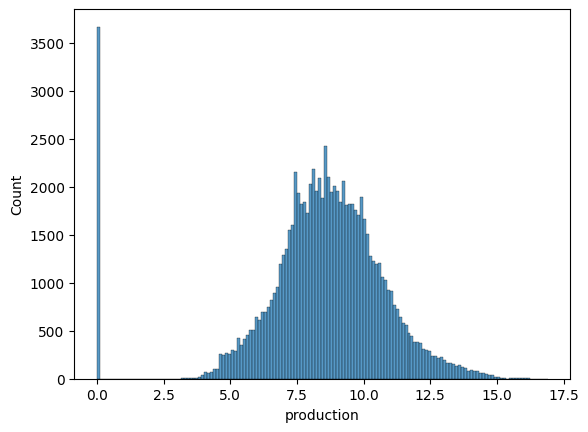

In [23]:
sns.histplot(np.log1p(df['production']))

**Pode-se notar claramente que temos um problema de alvo zero-inflated, onde a distribuição da variável target é assimétrica e tem alta concentração de 0's ou valores muito baixos**

## Análise Temporal

In [9]:
def analyze_temporal_data(df):
    """
    Análise temporal para dados de produção
    Args:
        df: DataFrame com 'date', 'bank', 'product', 'production'
    """
    # Preparar dados
    df = df.sort_values('date')
    
    print("="*50)
    print("ANÁLISE TEMPORAL")
    print("="*50)
    
    # 1. FREQUÊNCIA
    print("1. FREQUÊNCIA DOS DADOS")
    min_date = df['date'].min()
    max_date = df['date'].max()
    total_days = (max_date - min_date).days + 1
    unique_dates = df['date'].nunique()
    
    print(f"Período: {min_date.date()} a {max_date.date()}")
    print(f"Dias com dados: {unique_dates} de {total_days} ({unique_dates/total_days:.1%})")
    
    # 2. GAPS TEMPORAIS
    print(f"\n2. GAPS TEMPORAIS")
    all_dates = pd.date_range(min_date, max_date, freq='D')
    missing_dates = set(all_dates) - set(df['date'])
    
    print(f"Dias faltantes: {len(missing_dates)}")
    if len(missing_dates) > 0:
        weekend_missing = sum(1 for d in missing_dates if d.weekday() >= 5)
        print(f"Finais de semana faltantes: {weekend_missing} ({weekend_missing/len(missing_dates):.1%})")
        
        missing_sample = sorted(list(missing_dates))[:5]
        print(f"Primeiros dias faltantes: {[d.strftime('%Y-%m-%d (%a)') for d in missing_sample]}")
    
    # 3. TENDÊNCIA GERAL
    print(f"\n3. TENDÊNCIA GERAL")
    daily_production = df.groupby('date')['production'].sum()
    
    # Estatísticas básicas
    print(f"Produção média/dia: {daily_production.mean():.0f}")
    print(f"Primeiro vs último mês:")
    
    first_month = daily_production.iloc[:30].mean()
    last_month = daily_production.iloc[-30:].mean()
    change = ((last_month / first_month) - 1) * 100
    
    print(f"  Início: {first_month:.0f}")
    print(f"  Fim: {last_month:.0f}")
    print(f"  Mudança: {change:+.1f}%")
    
    # Tendência
    days_from_start = (daily_production.index - daily_production.index[0]).days
    slope = np.polyfit(days_from_start, daily_production.values, 1)[0]
    
    if slope > 1:
        trend = "CRESCENTE"
    elif slope < -1:
        trend = "DECRESCENTE"  
    else:
        trend = "ESTÁVEL"

    print(f"Tendência: {trend} ({slope:+.2f}/dia)")
    
    # GRÁFICO
    plt.figure(figsize=(12, 6))
    
    # Subplot 1: Série temporal
    plt.subplot(1, 2, 1)
    plt.plot(daily_production.index, daily_production.values, alpha=0.7)
    plt.plot(daily_production.index, np.poly1d(np.polyfit(days_from_start, daily_production.values, 1))(days_from_start), 
             '--', color='red', label='Tendência')
    plt.title('Produção Diária Total')
    plt.xlabel('Data')
    plt.ylabel('Produção')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Subplot 2: Dias da semana
    plt.subplot(1, 2, 2)
    df['month'] = df['date'].dt.month
    month_avg = df.groupby('month')['production'].mean()

    plt.bar(range(df['month'].min(), df['month'].max() + 1), month_avg.values)
    plt.title('Produção Média por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Produção Média')
    plt.xticks(range(df['month'].min(), df['month'].max() + 1), range(df['month'].min(), df['month'].max() + 1))

    plt.tight_layout()
    plt.show()
    
    return {
        'coverage': unique_dates/total_days,
        'missing_days': len(missing_dates),
        'trend_slope': slope,
        'avg_production': daily_production.mean()
    }

ANÁLISE TEMPORAL
1. FREQUÊNCIA DOS DADOS
Período: 2025-01-01 a 2025-09-23
Dias com dados: 266 de 266 (100.0%)

2. GAPS TEMPORAIS
Dias faltantes: 0

3. TENDÊNCIA GERAL
Produção média/dia: 15830223
Primeiro vs último mês:
  Início: 19614755
  Fim: 14978290
  Mudança: -23.6%
Tendência: DECRESCENTE (-34741.14/dia)


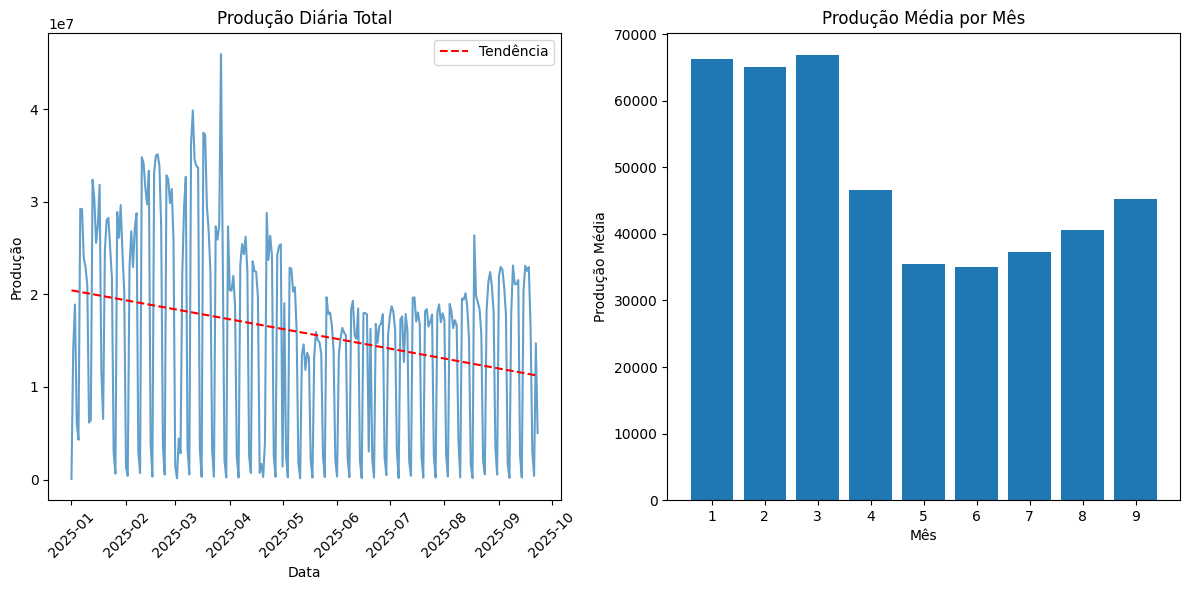

{'coverage': 1.0,
 'missing_days': 0,
 'trend_slope': np.float64(-34741.13834549174),
 'avg_production': np.float64(15830222.721390976)}

In [10]:
analyze_temporal_data(df)

## Sazonalidade por Dia da Semana

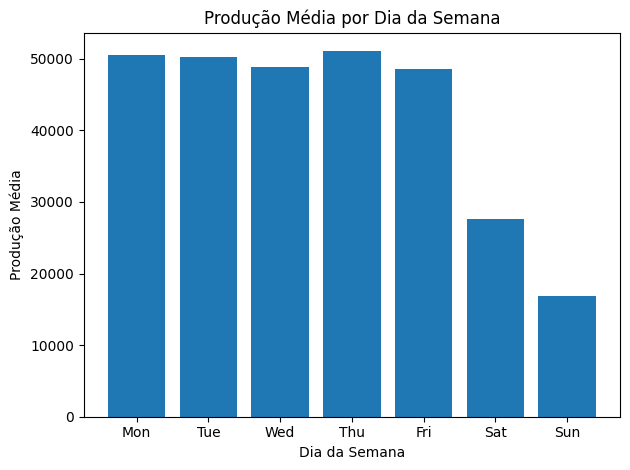

In [11]:
df['weekday'] = df['date'].dt.day_name()
weekday_avg = df.groupby('weekday')['production'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order).fillna(0)

plt.bar(range(7), weekday_avg.values)
plt.title('Produção Média por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Produção Média')
plt.xticks(range(7), [d[:3] for d in weekday_order])

plt.tight_layout()
plt.show()

# Feature Engineering
Já que os modelos principais que irei testar são modelos de árvores (que não capturam muito bem relações temporais), faz-se necessário a criação de variávies que possam traduzir o máximo a relação entre as séries anteriores

Utilizei as seguintes:
- Dia da Semana
- Mês
- Fim do Mês/Inicio de Mês
- Quinzena
- Final de Semana
- Lags (valor de production banco X produto passado)
- Média Móvel
- Desvio Padrão Móvel
- Feriados
- Trend
- Diff média de production por banco, produto e banco/produto
- Ratio média de production por banco, produto e banco/produto

In [12]:
# Médias 
df['mean_bank'] = (
    df.groupby('bank')['production']
    .transform(lambda x: x.shift(1).expanding().mean())
)

df['mean_product'] = (
    df.groupby('product')['production']
    .transform(lambda x: x.shift(1).expanding().mean())
)

df['mean_bp'] = (
    df.groupby(['bank','product'])['production']
    .transform(lambda x: x.shift(1).expanding().mean())
)

df['std_bank'] = (
    df.groupby('bank')['production']
    .transform(lambda x: x.shift(1).expanding().std())
)

df['std_product'] = (
    df.groupby('product')['production']
    .transform(lambda x: x.shift(1).expanding().std())
)

df['std_bp'] = (
    df.groupby(['bank','product'])['production']
    .transform(lambda x: x.shift(1).expanding().std())
)

# Lags
df['lag_1'] = df.groupby(['bank','product'])['production'].shift(1).fillna(df['mean_bp'])
df['lag_7'] = df.groupby(['bank','product'])['production'].shift(7).fillna(df['mean_bp'])
df['lag_30'] = df.groupby(['bank','product'])['production'].shift(30).fillna(df['mean_bp'])

# Médias móveis
df['rolling_mean_7'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(7).mean()).fillna(df['mean_bp'])
df['rolling_mean_30'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(30).mean()).fillna(df['mean_bp'])
df['rolling_mean_60'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(60).mean()).fillna(df['mean_bp'])

# Desvio padrão
df['rolling_std_7'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(7).std()).fillna(df['std_bp'])
df['rolling_std_30'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(30).std()).fillna(df['std_bp'])
df['rolling_std_60'] = df.groupby(['bank','product'])['production'].transform(lambda x: x.shift(1).rolling(60).std()).fillna(df['std_bp'])

# Features de calendário
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['is_month_end'] = df['date'].dt.is_month_end.astype(int)
df['fortnight'] = df['date'].apply(lambda x: 'First Fortnight' if x.day <= 15 else 'Second Fortnight')
df["is_weekend"] = df['date'].dt.dayofweek > 4
df["is_weekend"] = df["is_weekend"].astype(int)

# Feriados (externa)
br_holidays = holidays.Brazil()
df['is_holiday'] = df['date'].isin(br_holidays).astype(int)
df['is_pre_holiday'] = df['date'].shift(1).isin(br_holidays).astype(int)
df['is_post_holiday'] = df['date'].shift(-1).isin(br_holidays).astype(int)

# Variáveis Produção
# OBS: o shift/lag  evitam data leakage

df['diff_mean_lag1_bank'] = df['lag_1'] - df['mean_bank']
df['diff_mean_lag7_bank'] = df['lag_7'] - df['mean_bank']
df['diff_mean_lag30_bank'] = df['lag_30'] - df['mean_bank']

df['diff_mean_lag1_product'] = df['lag_1'] - df['mean_product']
df['diff_mean_lag7_product'] = df['lag_7'] - df['mean_product']
df['diff_mean_lag30_product'] = df['lag_30'] - df['mean_product']

df['diff_mean_lag1_bank_product'] = df['lag_1'] - df['mean_bp']
df['diff_mean_lag7_bank_product'] = df['lag_7'] - df['mean_bp']
df['diff_mean_lag30_bank_product'] = df['lag_30'] - df['mean_bp']

df['ratio_mean_lag1_bank'] = df['lag_1'] / (df['mean_bank'] + 1e-6)
df['ratio_mean_lag7_bank'] = df['lag_7'] / (df['mean_bank'] + 1e-6)
df['ratio_mean_lag30_bank'] = df['lag_30'] / (df['mean_bank'] + 1e-6)

df['ratio_mean_lag1_product'] = df['lag_1'] / (df['mean_product'] + 1e-6)
df['ratio_mean_lag7_product'] = df['lag_7'] / (df['mean_product'] + 1e-6)
df['ratio_mean_lag30_product'] = df['lag_30'] / (df['mean_product'] + 1e-6)

df['ratio_mean_lag1_bank_product'] = df['lag_1'] / (df['mean_bp'] + 1e-6)
df['ratio_mean_lag7_bank_product'] = df['lag_7'] / (df['mean_bp'] + 1e-6)
df['ratio_mean_lag30_bank_product'] = df['lag_30'] / (df['mean_bp'] + 1e-6)

# Trend
df['trend'] = df.groupby(['bank','product']).cumcount()

In [13]:
# Fills dos primeiros registros (0)
features_to_fill_zero = [
    # Médias e Desvios Expandidos
    'mean_bank', 'mean_product', 'mean_bp',
    'std_bank', 'std_product', 'std_bp',

    # Lags (já preenchidas com mean_bp/std_bp, mas o 1º valor permanece NaN)
    'lag_1', 'lag_7', 'lag_30',
    'rolling_mean_7', 'rolling_mean_30', 'rolling_mean_60',
    'rolling_std_7', 'rolling_std_30', 'rolling_std_60',

    # Cross-Features (elas herdam os NaN dos lags/means)
    'diff_mean_lag1_bank', 'diff_mean_lag7_bank', 'diff_mean_lag30_bank',
    'diff_mean_lag1_product', 'diff_mean_lag7_product', 'diff_mean_lag30_product',
    'diff_mean_lag1_bank_product', 'diff_mean_lag7_bank_product', 'diff_mean_lag30_bank_product',
    'ratio_mean_lag1_bank', 'ratio_mean_lag7_bank', 'ratio_mean_lag30_bank',
    'ratio_mean_lag1_product', 'ratio_mean_lag7_product', 'ratio_mean_lag30_product',
    'ratio_mean_lag1_bank_product', 'ratio_mean_lag7_bank_product', 'ratio_mean_lag30_bank_product'
]

df[features_to_fill_zero] = df[features_to_fill_zero].fillna(0)

# As features is_pre_holiday e is_post_holiday usam shift(1) e shift(-1), respectivamente,
# e podem ter um NaN no primeiro e último registro do DataFrame global.
df['is_pre_holiday'] = df['is_pre_holiday'].fillna(0)
df['is_post_holiday'] = df['is_post_holiday'].fillna(0)

## Verificando Desempenho das Novas Variáveis

In [ ]:
def analyze_categorical_features(df, tgt_col='production'):
    cat_cols = ['bank', 'product', 'day_of_week', 'month', 'is_month_end', 'fortnight', 'is_weekend', 'is_holiday', 'is_pre_holiday', 'is_post_holiday']

    for col in cat_cols:
        if col in df.columns:
            # Gráfico: Média da Produção por Categoria
            plt.figure(figsize=(10, 5))
            mean_prod = df.groupby(col)[tgt_col].mean().sort_values(ascending=False)
            mean_prod.plot(kind='bar', color='skyblue')
            plt.title(f"Média da Produção por Categoria: {col}")
            plt.ylabel(f"Média de {tgt_col}")
            plt.xticks(rotation=45, ha='right')
            plt.show()

            # Teste Estatístico: ANOVA (se a feature tiver mais de 2 categorias)
            # Verifica se a média da produção é estatisticamente diferente entre os níveis.
            try:
                if df[col].nunique() > 1:
                    formula = f'{tgt_col} ~ C({col})'
                    lm = ols(formula, data=df).fit()
                    anova_table = sm.stats.anova_lm(lm, typ=2)
                    p_value = anova_table.loc[f'C({col})', 'PR(>F)']
                    print(f"ANOVA P-value for '{col}': {p_value:.4f}")
                    if p_value < 0.05:
                        print(f"-> A variável '{col}' tem impacto estatisticamente significativo na média da Produção (p < 0.05).\n")
                    else:
                        print(f"-> A variável '{col}' NÃO tem impacto significativo na média da Produção (p >= 0.05).\n")
            except Exception as e:
                print(f"Não foi possível rodar ANOVA para {col}: {e}")


def analyze_numerical_features(df, tgt_col='production'):
    # Excluindo 'date' e 'production' do conjunto de features numéricas
    num_cols = df.select_dtypes(include=['float', 'int']).columns.drop(['production', 'trend'], errors='ignore')
    
    # Adicionando 'trend' e as colunas de lag/rolling que você criou
    relevant_num_cols = list(num_cols) + ['trend', 'lag_1', 'rolling_mean_7', 'diff_mean_lag1_bank'] 
    relevant_num_cols = [col for col in relevant_num_cols if col in df.columns]

    for col in relevant_num_cols:
        # Scatter Plot para visualizar a relação
        plt.figure(figsize=(10, 5))
        # Amostragem para evitar plots muito densos, se o DF for grande
        sample_df = df.sample(min(10000, len(df)), random_state=42)
        sns.scatterplot(x=sample_df[col], y=sample_df[tgt_col], alpha=0.6)
        plt.title(f"Relação entre {col} e Produção")
        plt.xlabel(col)
        plt.ylabel(tgt_col)
        plt.show()

        # Correlação de Pearson (linearidade)
        try:
            corr, p_value = pearsonr(df[col].dropna(), df[tgt_col].loc[df[col].notna()])
            print(f"Correlação de Pearson entre {col} e Produção: {corr:.4f} (p-value: {p_value:.4f})\n")
        except Exception as e:
            print(f"Não foi possível calcular a correlação para {col}: {e}")

### Categóricas (Variância)

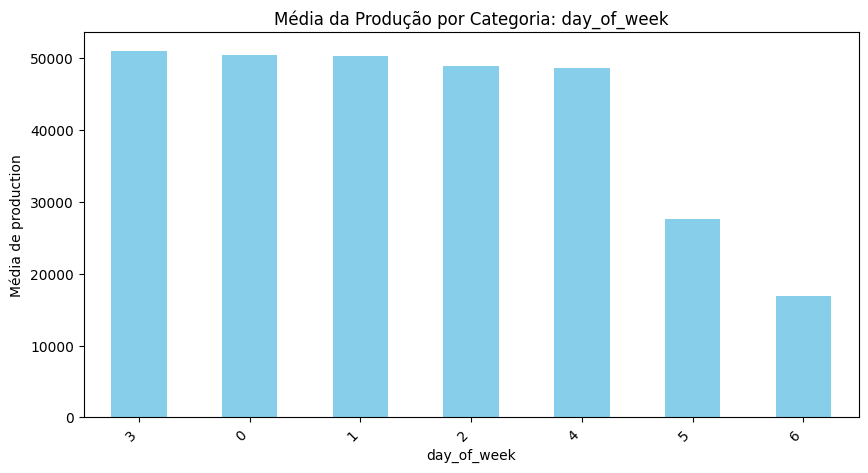

ANOVA P-value for 'day_of_week': 0.0000
-> A variável 'day_of_week' tem impacto estatisticamente significativo na média da Produção (p < 0.05).



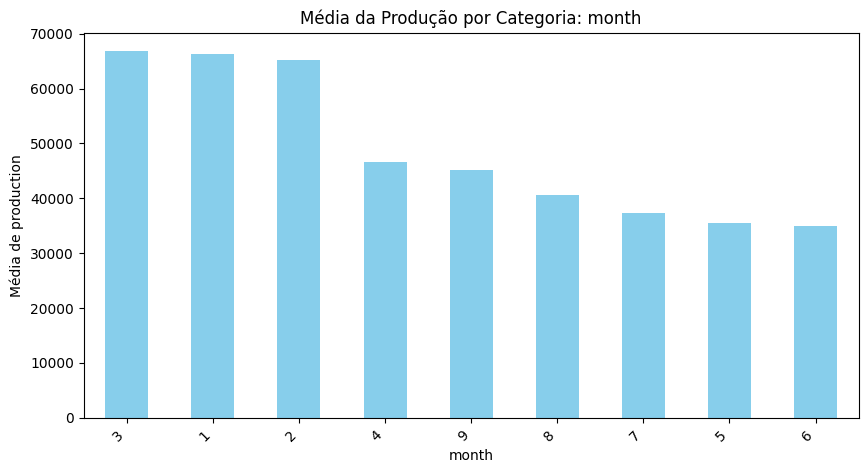

ANOVA P-value for 'month': 0.0000
-> A variável 'month' tem impacto estatisticamente significativo na média da Produção (p < 0.05).



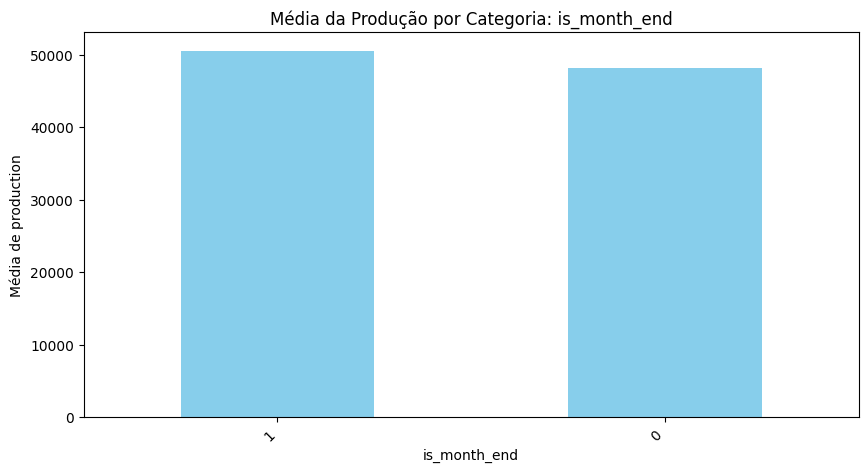

ANOVA P-value for 'is_month_end': 0.6393
-> A variável 'is_month_end' NÃO tem impacto significativo na média da Produção (p >= 0.05).



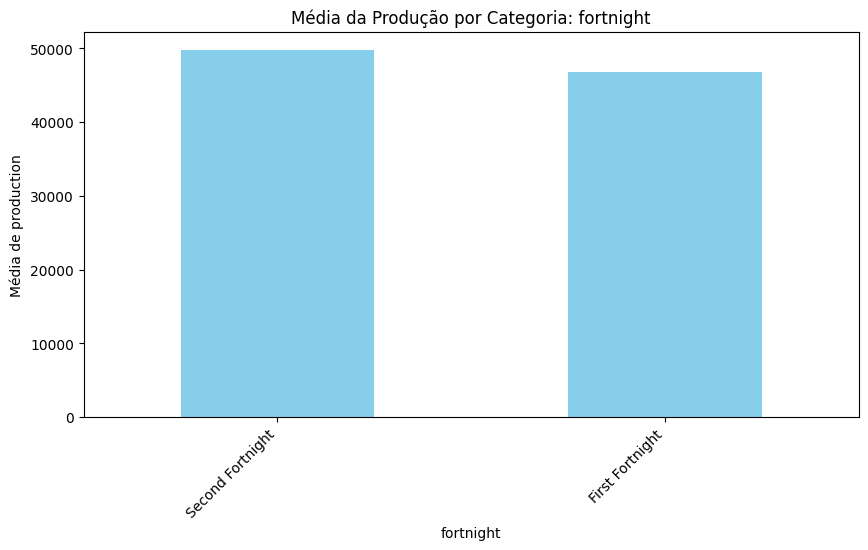

ANOVA P-value for 'fortnight': 0.1006
-> A variável 'fortnight' NÃO tem impacto significativo na média da Produção (p >= 0.05).



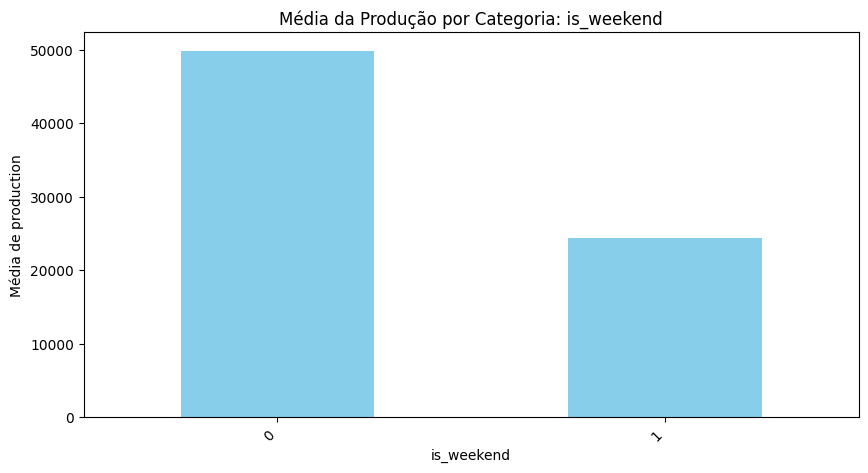

ANOVA P-value for 'is_weekend': 0.0000
-> A variável 'is_weekend' tem impacto estatisticamente significativo na média da Produção (p < 0.05).



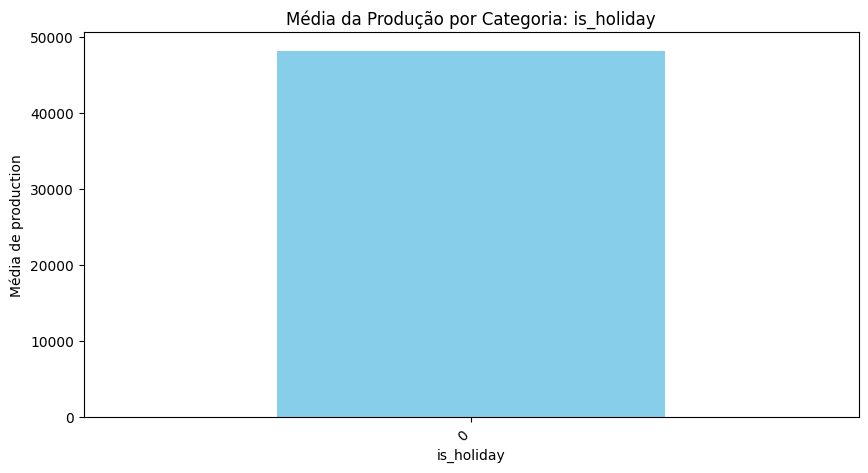

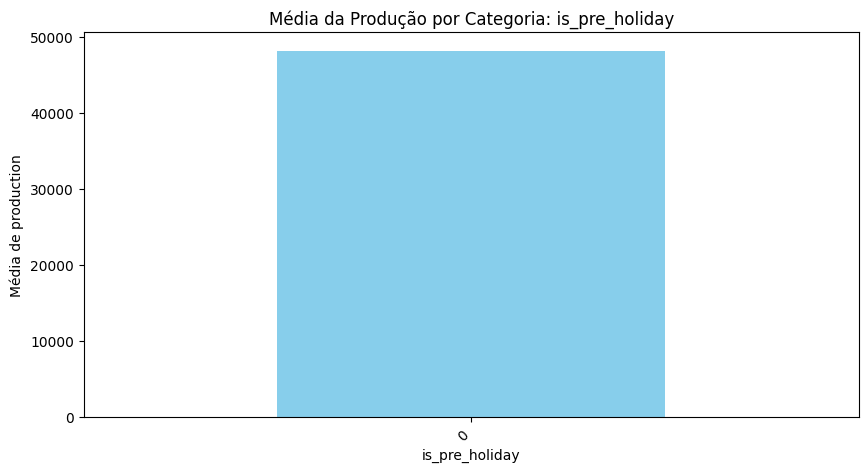

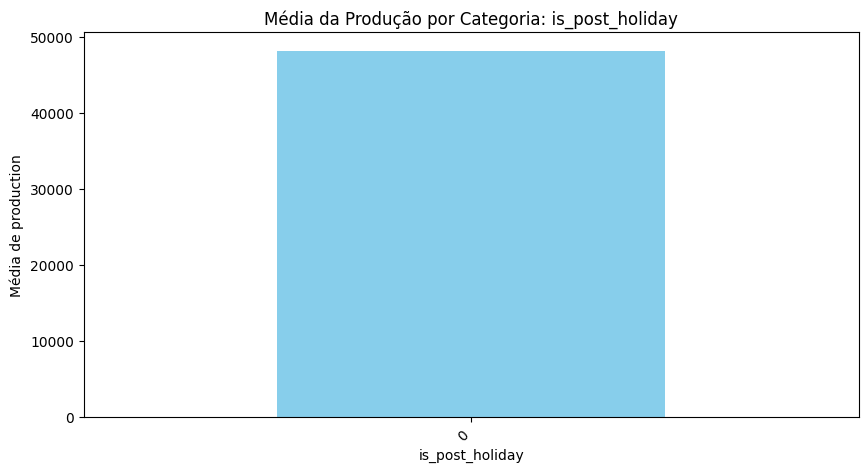

In [ ]:
analyze_categorical_features(df.drop(['bank', 'product'], axis=1))

### Numéricas (Correlação)

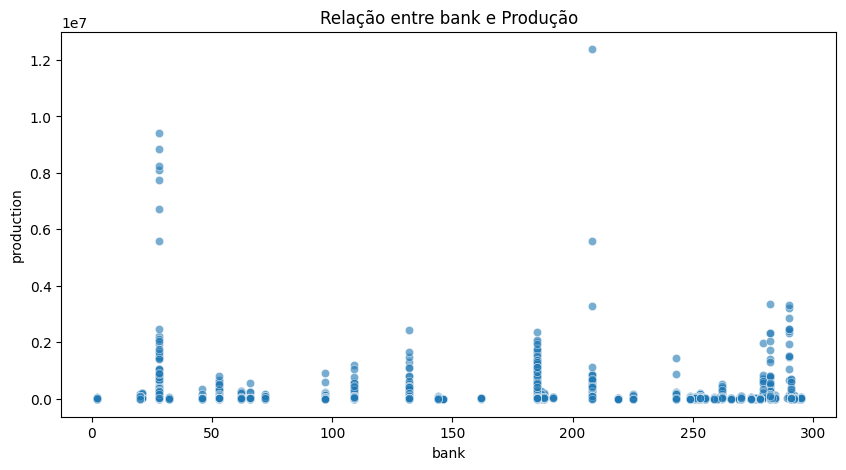

Correlação de Pearson entre bank e Produção: 0.0147 (p-value: 0.0000)



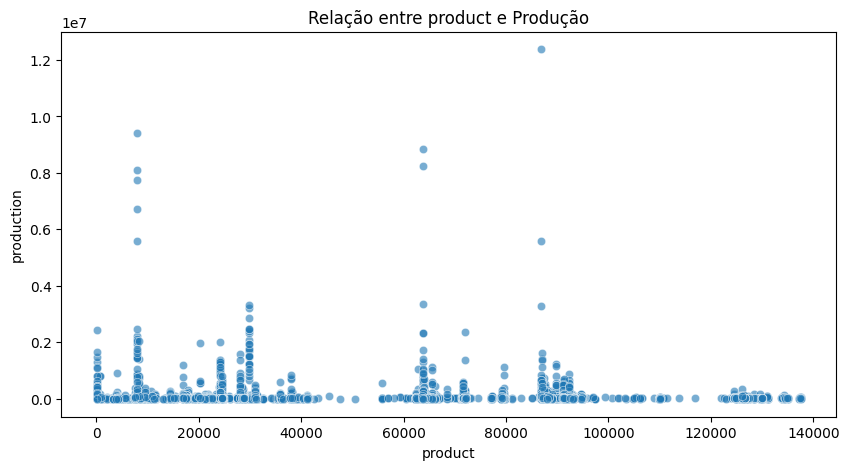

Correlação de Pearson entre product e Produção: -0.0539 (p-value: 0.0000)



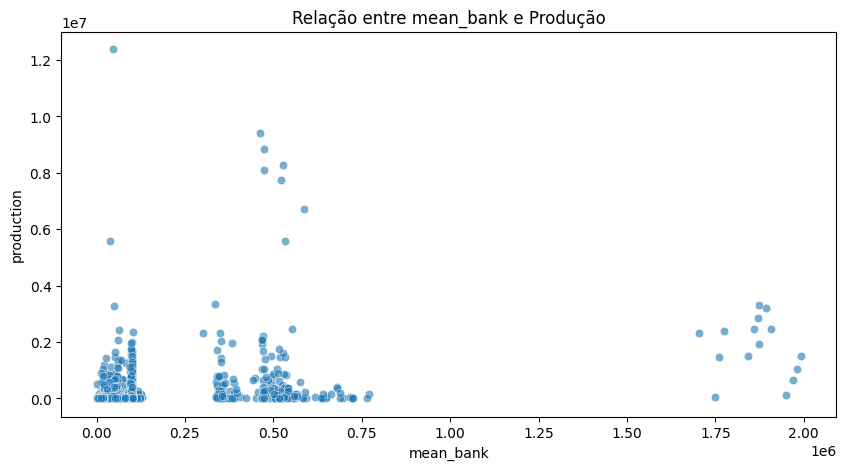

Correlação de Pearson entre mean_bank e Produção: 0.4188 (p-value: 0.0000)



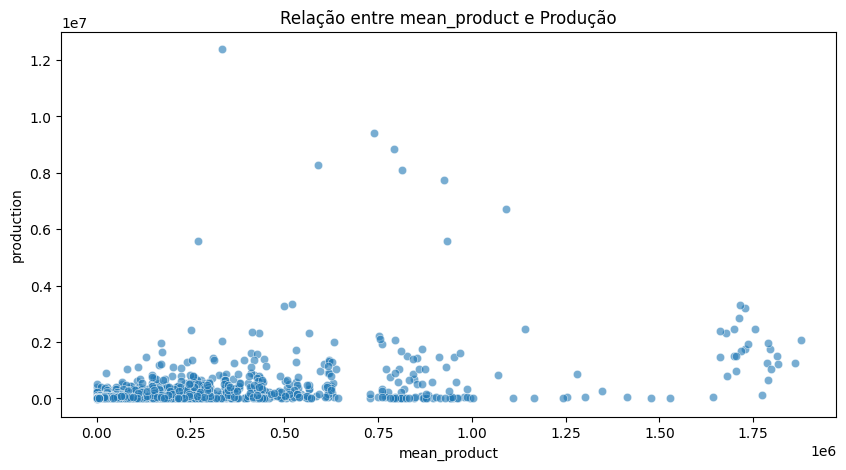

Correlação de Pearson entre mean_product e Produção: 0.5290 (p-value: 0.0000)



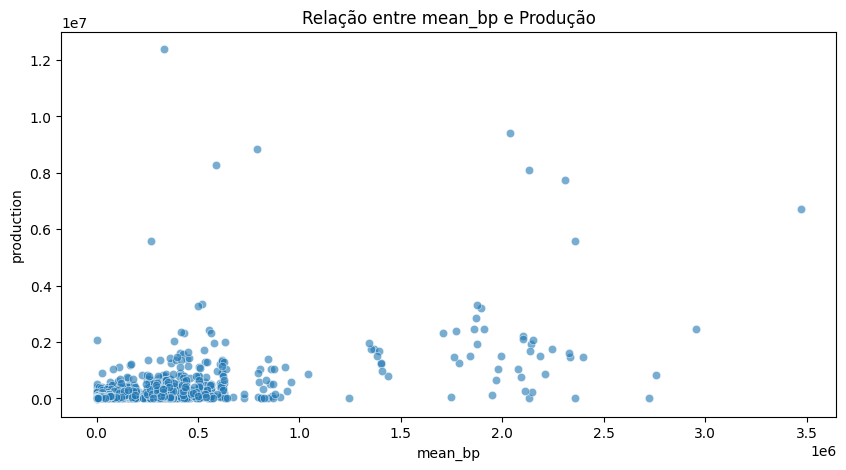

Correlação de Pearson entre mean_bp e Produção: 0.6166 (p-value: 0.0000)



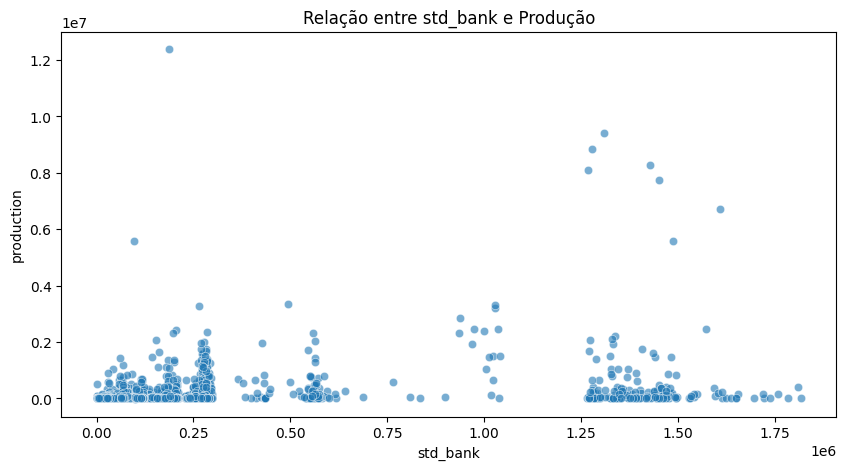

Correlação de Pearson entre std_bank e Produção: 0.3111 (p-value: 0.0000)



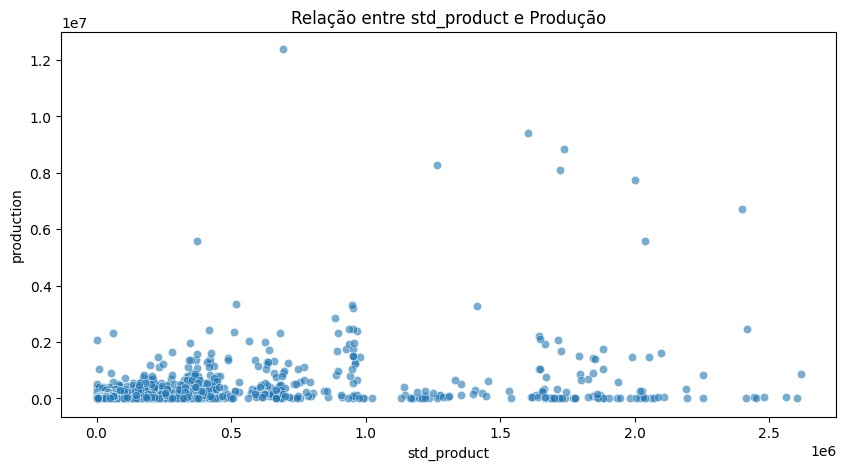

Correlação de Pearson entre std_product e Produção: 0.4292 (p-value: 0.0000)



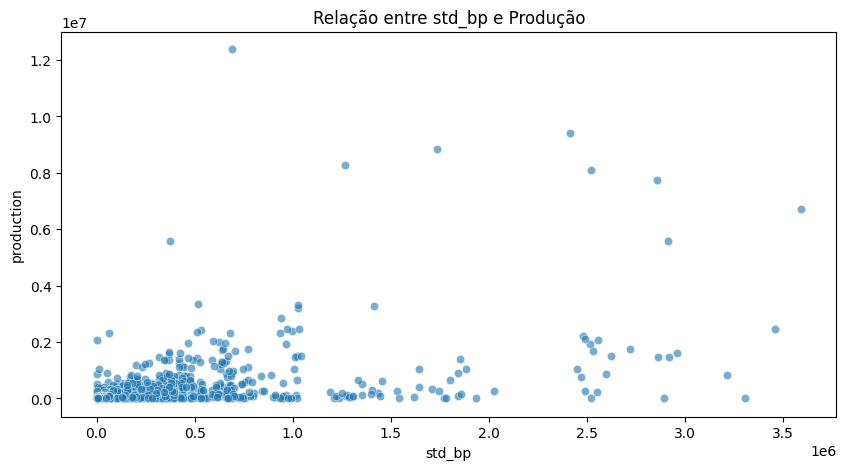

Correlação de Pearson entre std_bp e Produção: 0.5448 (p-value: 0.0000)



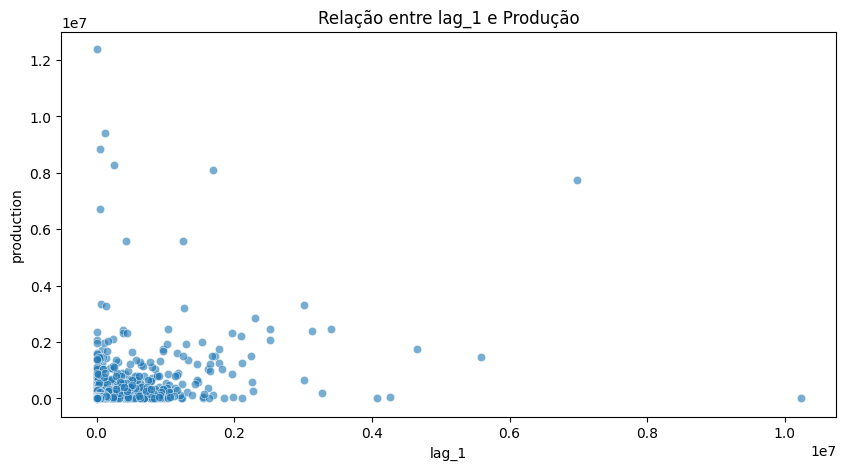

Correlação de Pearson entre lag_1 e Produção: 0.4201 (p-value: 0.0000)



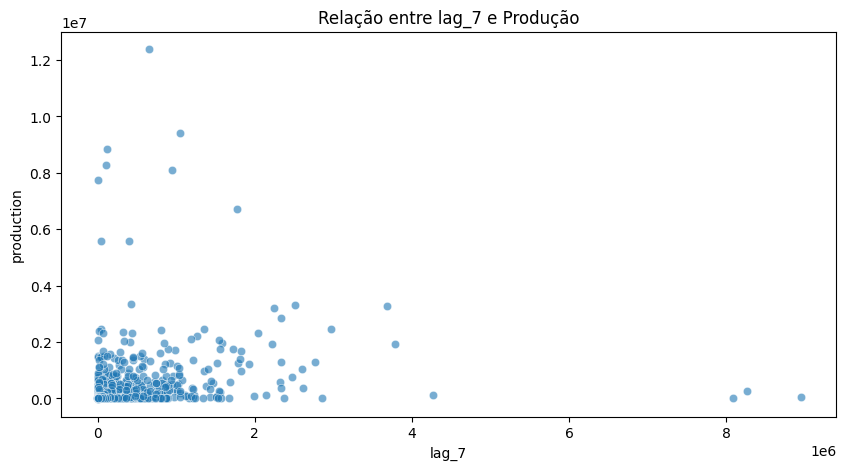

Correlação de Pearson entre lag_7 e Produção: 0.3719 (p-value: 0.0000)



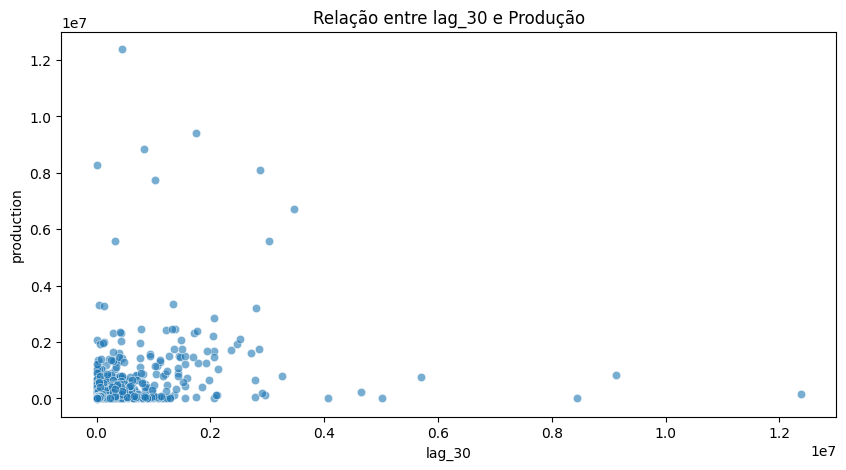

Correlação de Pearson entre lag_30 e Produção: 0.4058 (p-value: 0.0000)



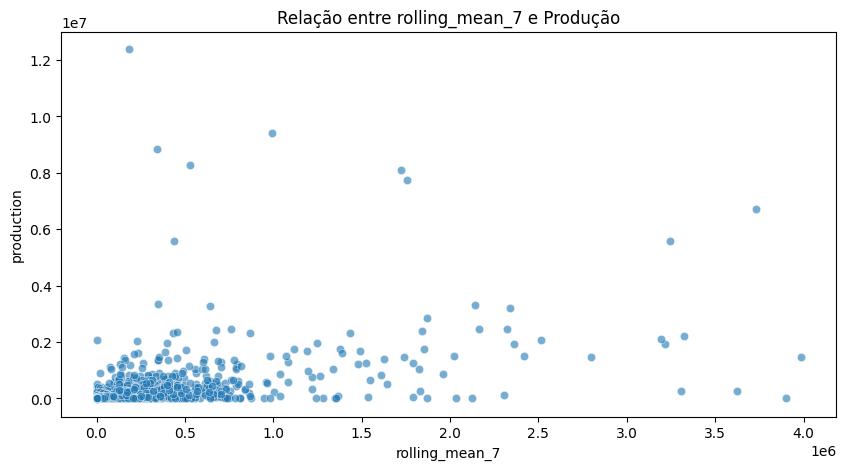

Correlação de Pearson entre rolling_mean_7 e Produção: 0.5620 (p-value: 0.0000)



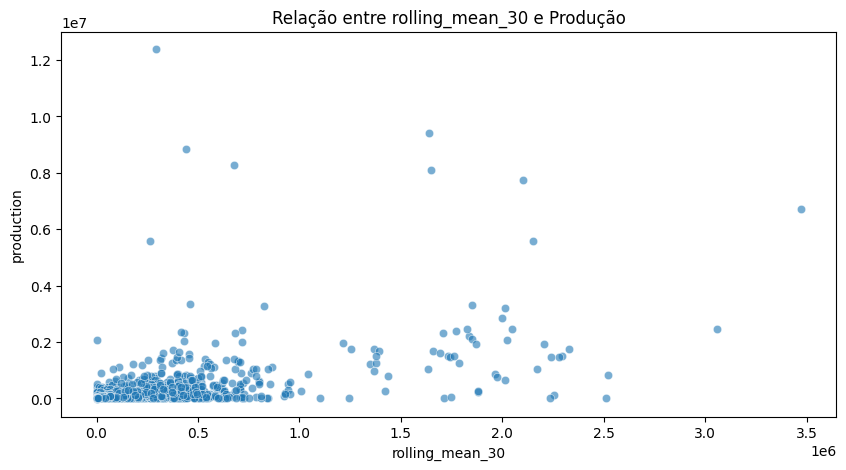

Correlação de Pearson entre rolling_mean_30 e Produção: 0.6056 (p-value: 0.0000)



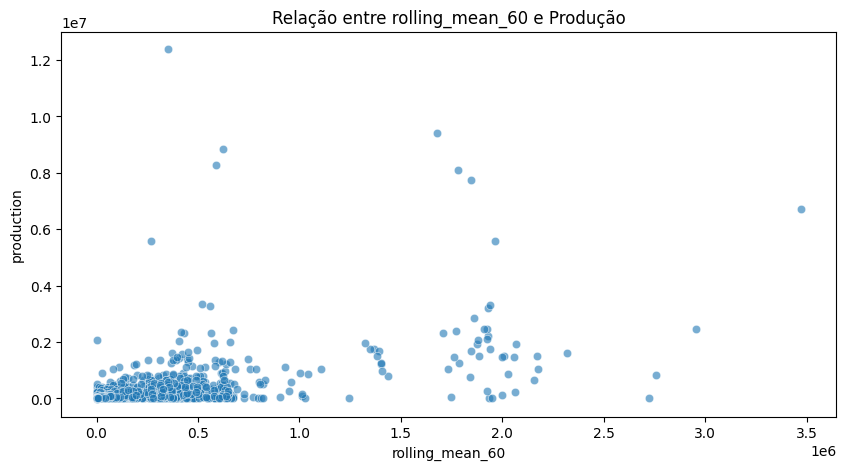

Correlação de Pearson entre rolling_mean_60 e Produção: 0.6134 (p-value: 0.0000)



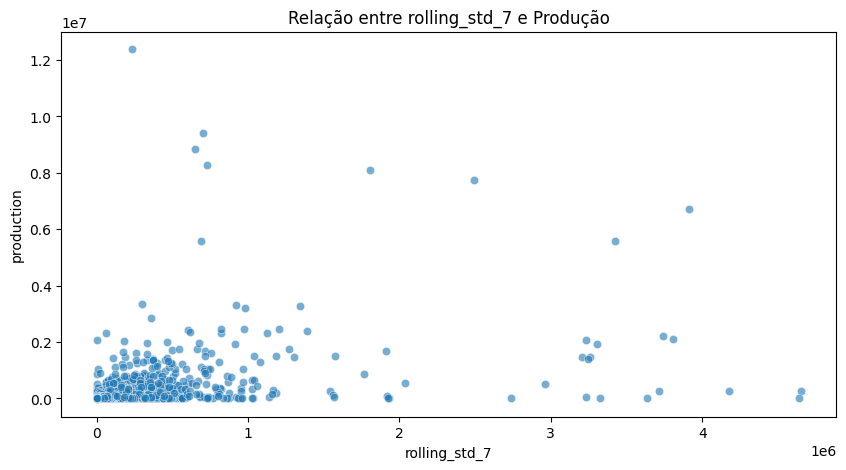

Correlação de Pearson entre rolling_std_7 e Produção: 0.4427 (p-value: 0.0000)



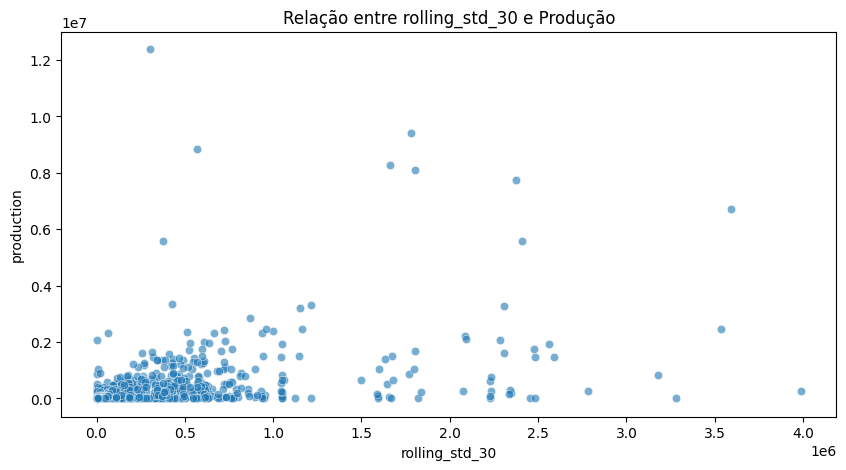

Correlação de Pearson entre rolling_std_30 e Produção: 0.4998 (p-value: 0.0000)



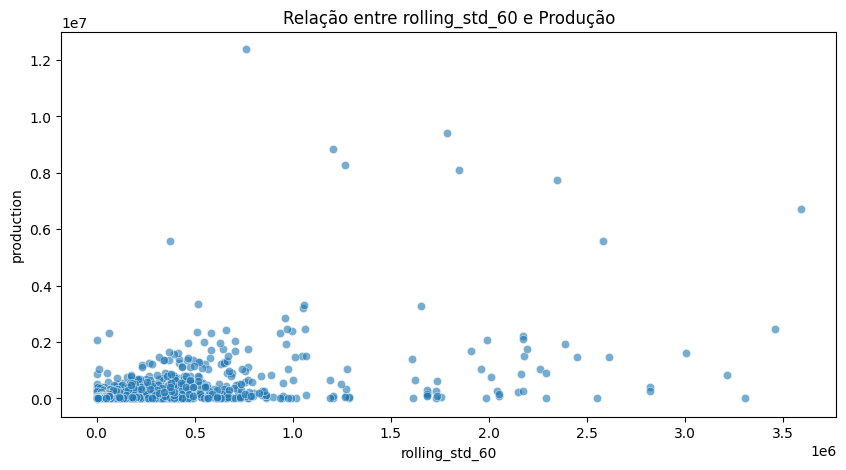

Correlação de Pearson entre rolling_std_60 e Produção: 0.5226 (p-value: 0.0000)



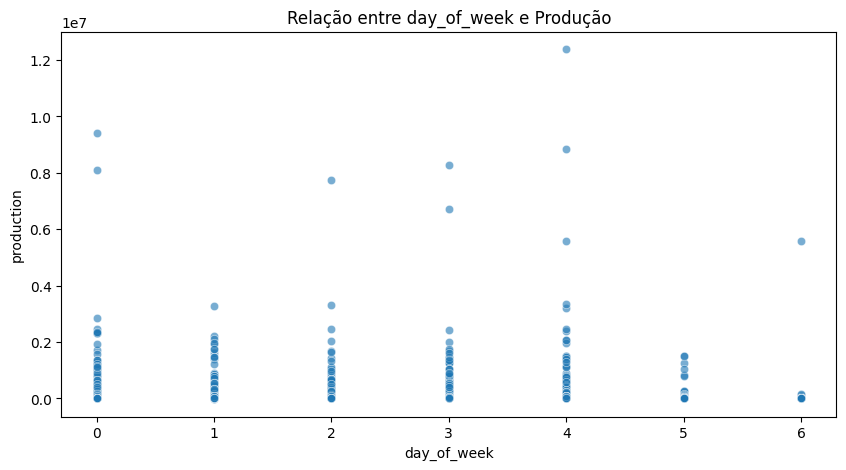

Correlação de Pearson entre day_of_week e Produção: -0.0139 (p-value: 0.0000)



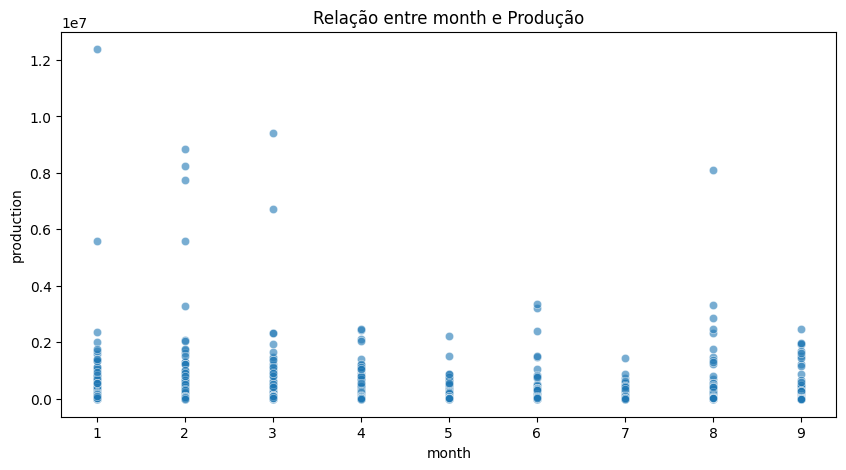

Correlação de Pearson entre month e Produção: -0.0375 (p-value: 0.0000)



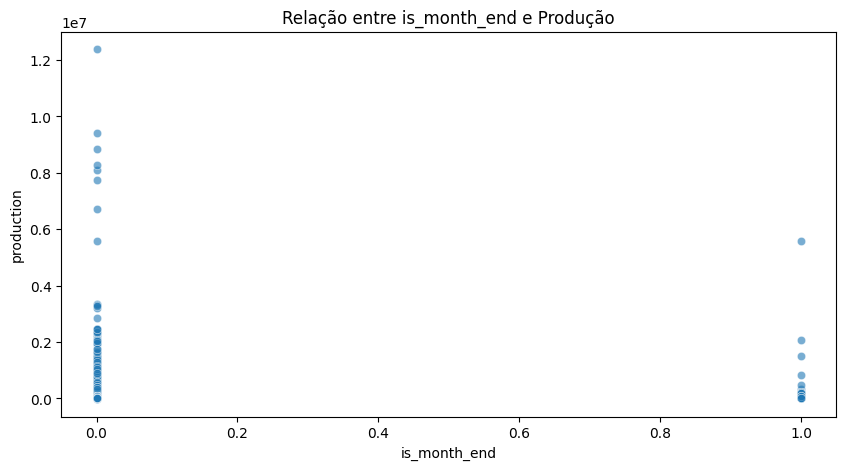

Correlação de Pearson entre is_month_end e Produção: 0.0016 (p-value: 0.6393)



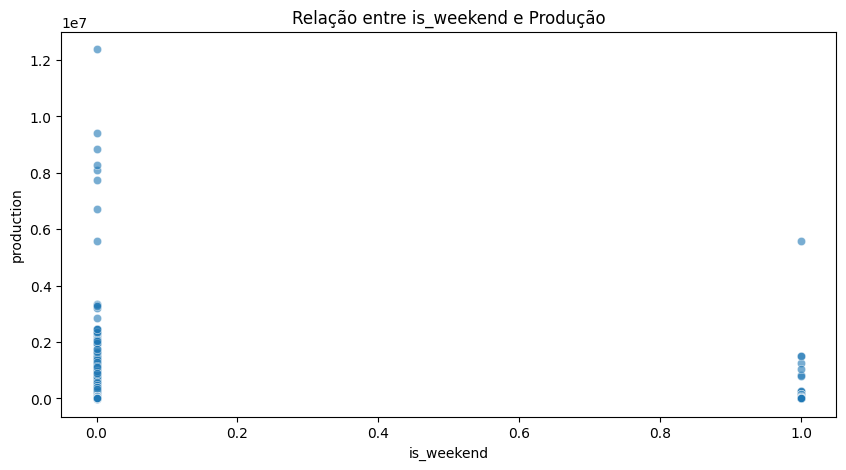

Correlação de Pearson entre is_weekend e Produção: -0.0238 (p-value: 0.0000)



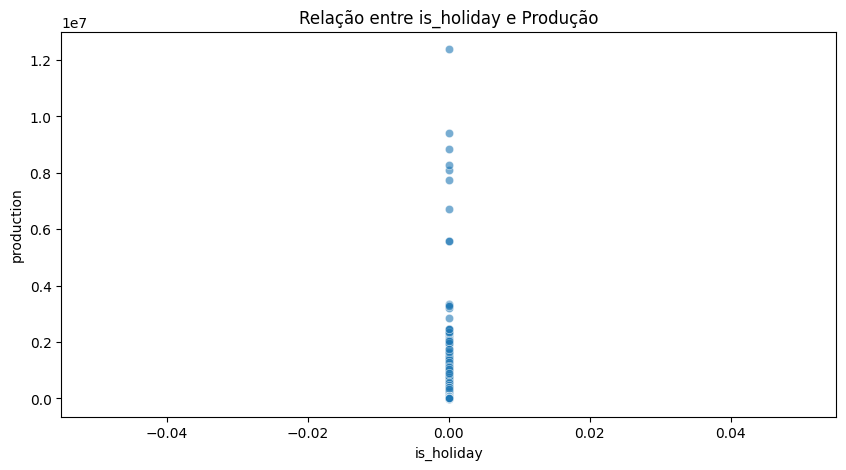

Correlação de Pearson entre is_holiday e Produção: nan (p-value: nan)



/tmp/ipykernel_44909/2829784215.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df[col].dropna(), df[tgt_col].loc[df[col].notna()])


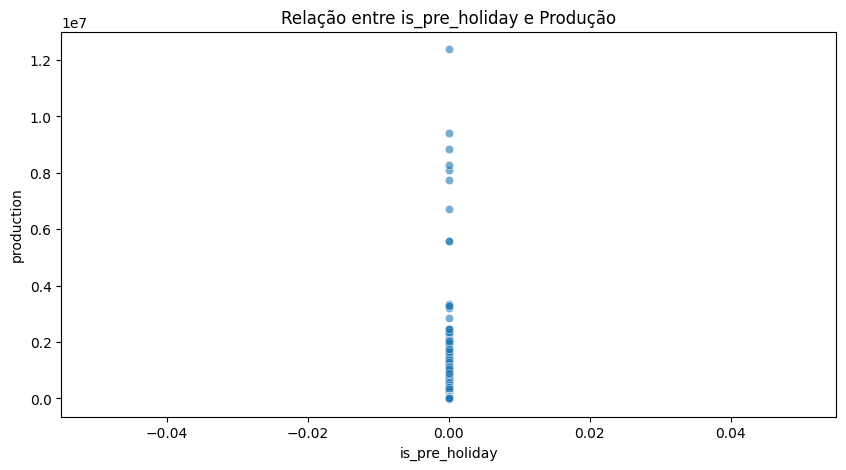

/tmp/ipykernel_44909/2829784215.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df[col].dropna(), df[tgt_col].loc[df[col].notna()])


Correlação de Pearson entre is_pre_holiday e Produção: nan (p-value: nan)



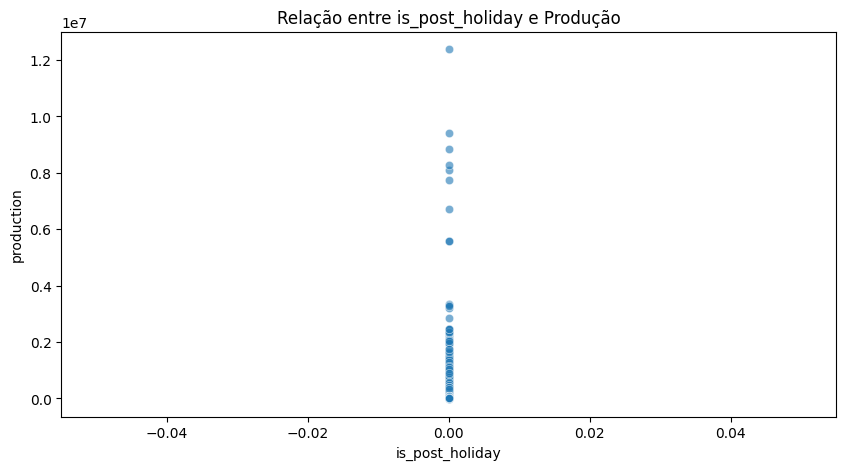

/tmp/ipykernel_44909/2829784215.py:24: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_value = pearsonr(df[col].dropna(), df[tgt_col].loc[df[col].notna()])


Correlação de Pearson entre is_post_holiday e Produção: nan (p-value: nan)



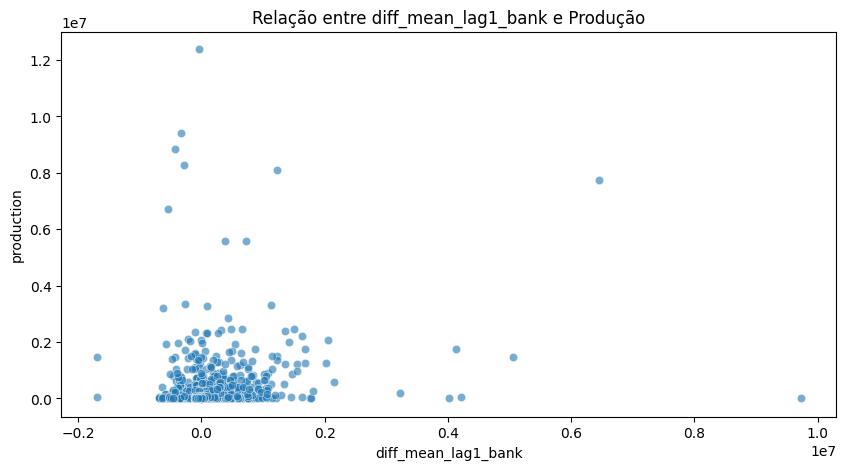

Correlação de Pearson entre diff_mean_lag1_bank e Produção: 0.2641 (p-value: 0.0000)



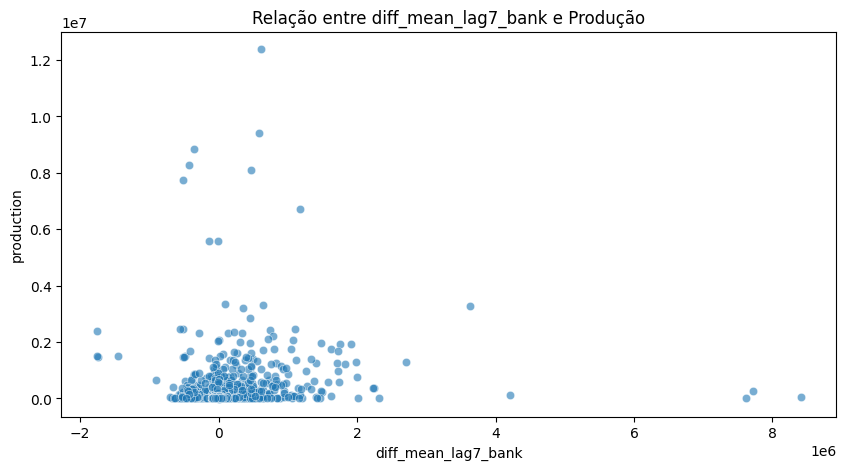

Correlação de Pearson entre diff_mean_lag7_bank e Produção: 0.2096 (p-value: 0.0000)



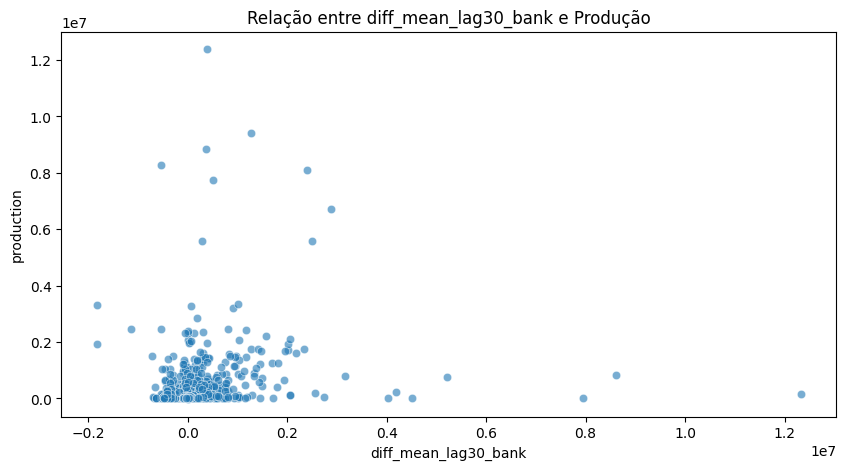

Correlação de Pearson entre diff_mean_lag30_bank e Produção: 0.2438 (p-value: 0.0000)



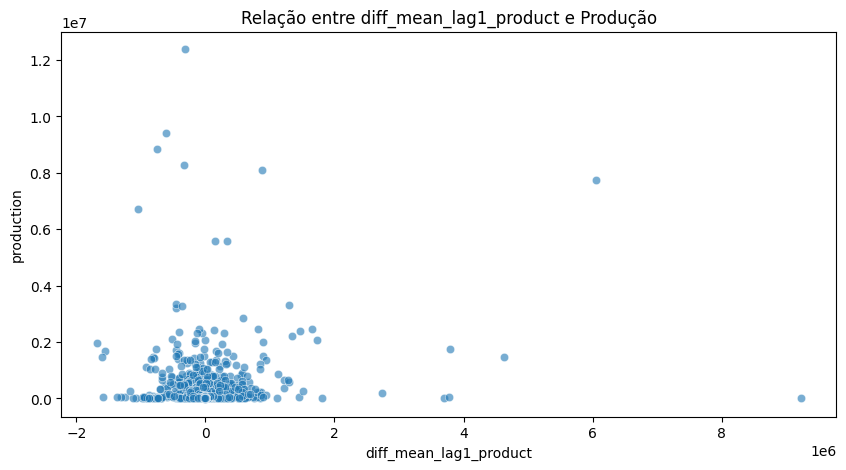

Correlação de Pearson entre diff_mean_lag1_product e Produção: 0.1482 (p-value: 0.0000)



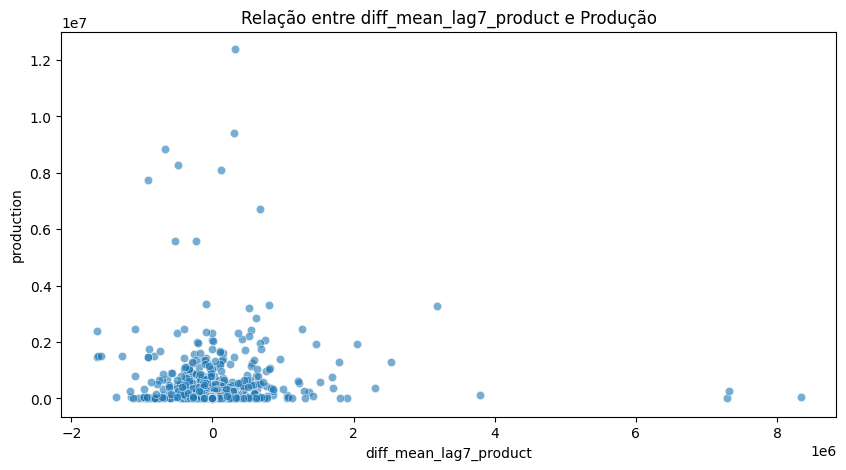

Correlação de Pearson entre diff_mean_lag7_product e Produção: 0.0882 (p-value: 0.0000)



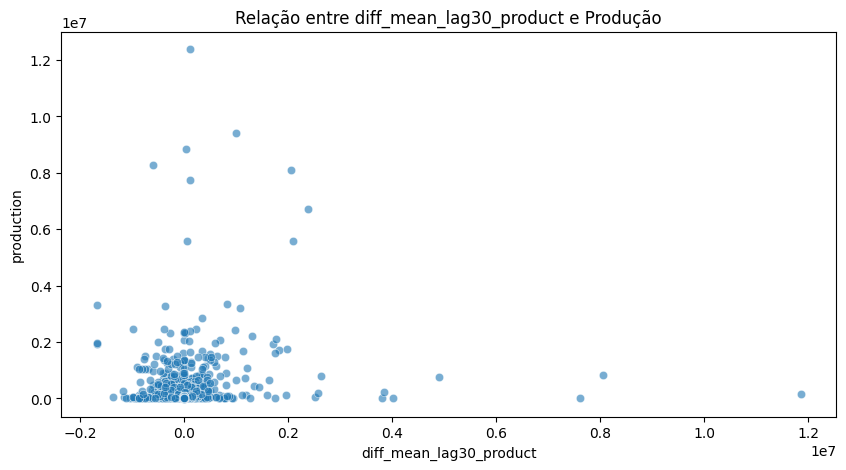

Correlação de Pearson entre diff_mean_lag30_product e Produção: 0.1224 (p-value: 0.0000)



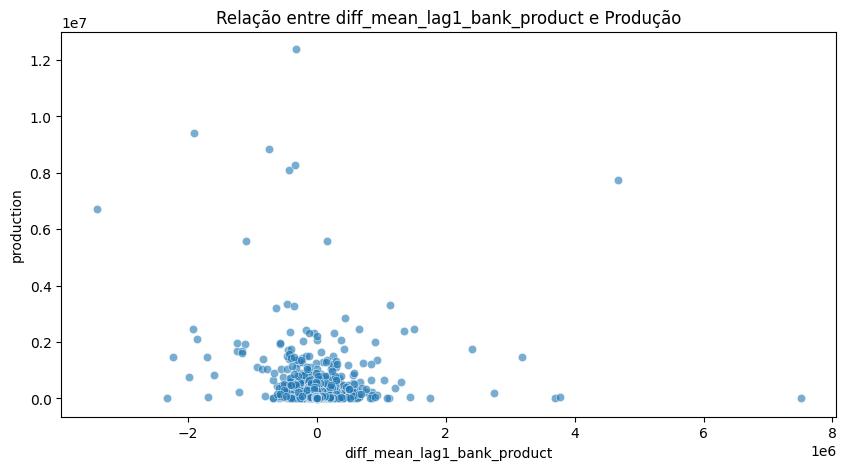

Correlação de Pearson entre diff_mean_lag1_bank_product e Produção: 0.0142 (p-value: 0.0000)



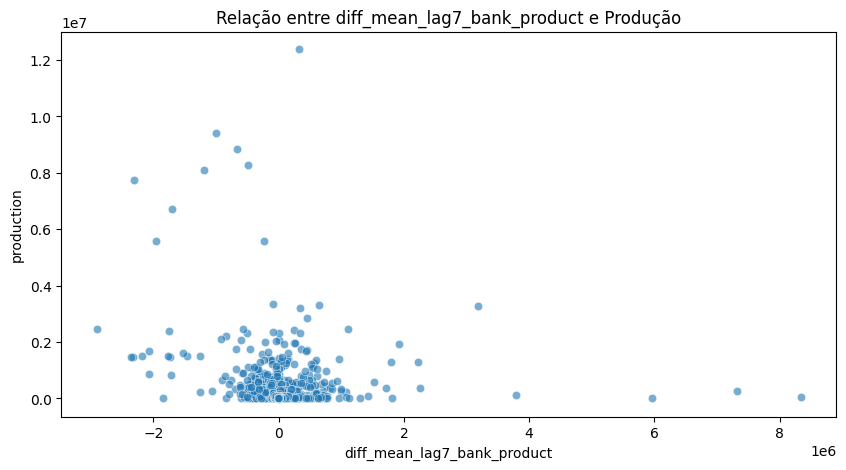

Correlação de Pearson entre diff_mean_lag7_bank_product e Produção: -0.0528 (p-value: 0.0000)



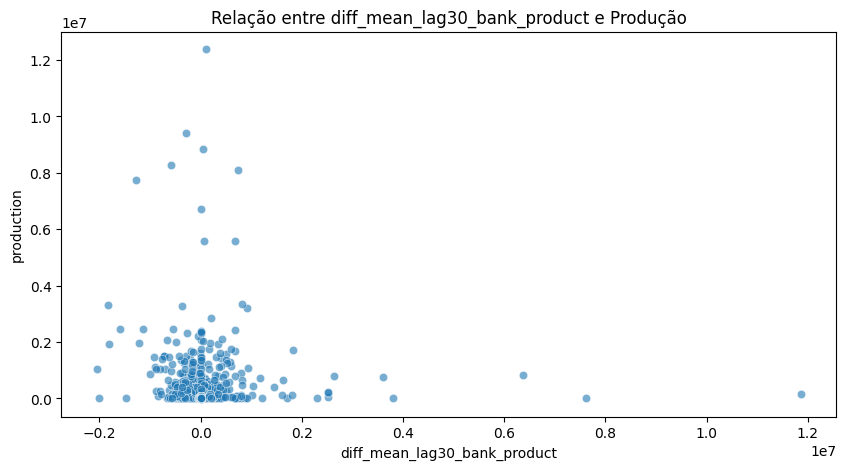

Correlação de Pearson entre diff_mean_lag30_bank_product e Produção: -0.0211 (p-value: 0.0000)



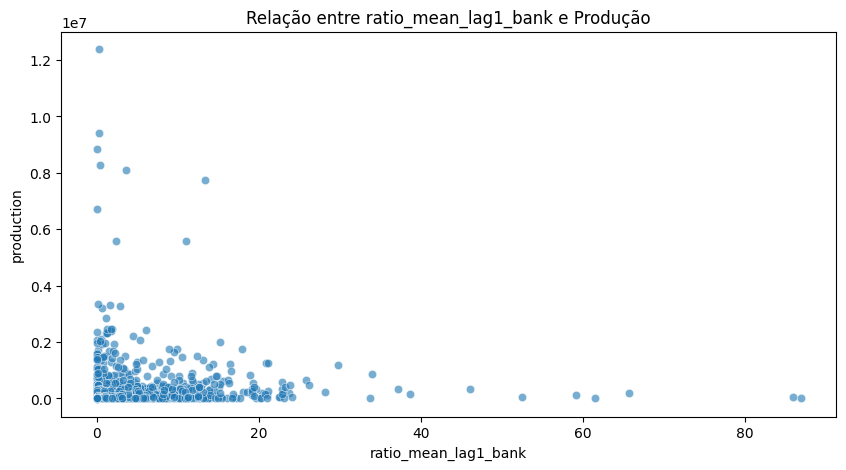

Correlação de Pearson entre ratio_mean_lag1_bank e Produção: 0.1705 (p-value: 0.0000)



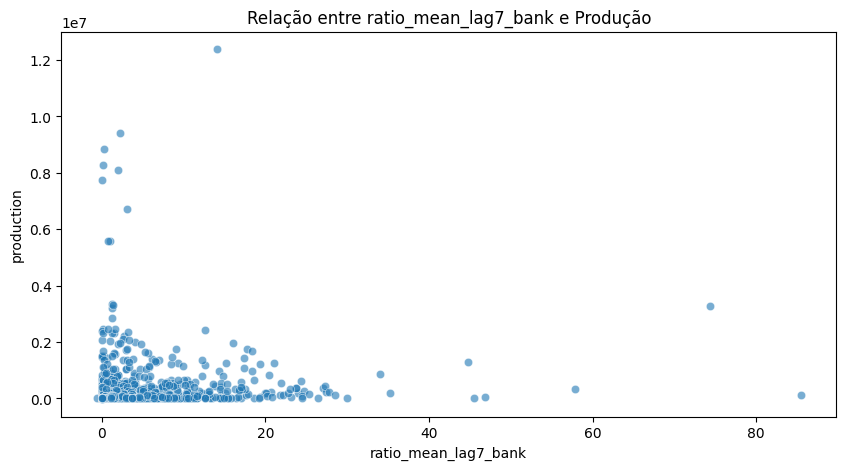

Correlação de Pearson entre ratio_mean_lag7_bank e Produção: 0.1589 (p-value: 0.0000)



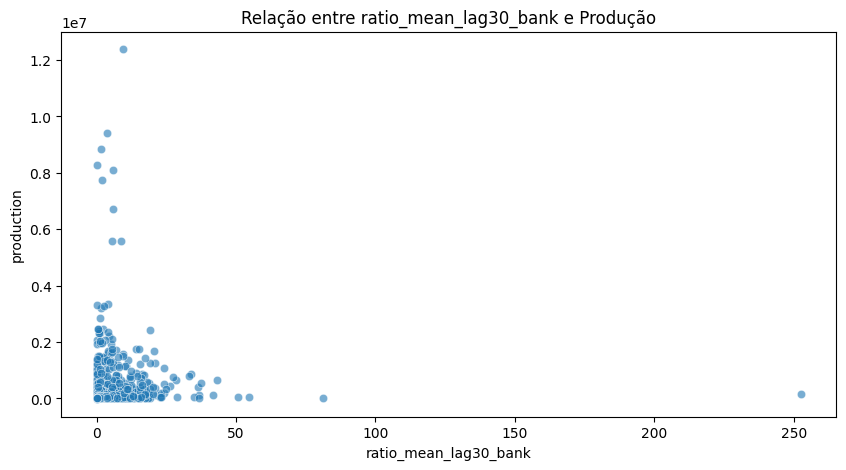

Correlação de Pearson entre ratio_mean_lag30_bank e Produção: 0.1677 (p-value: 0.0000)



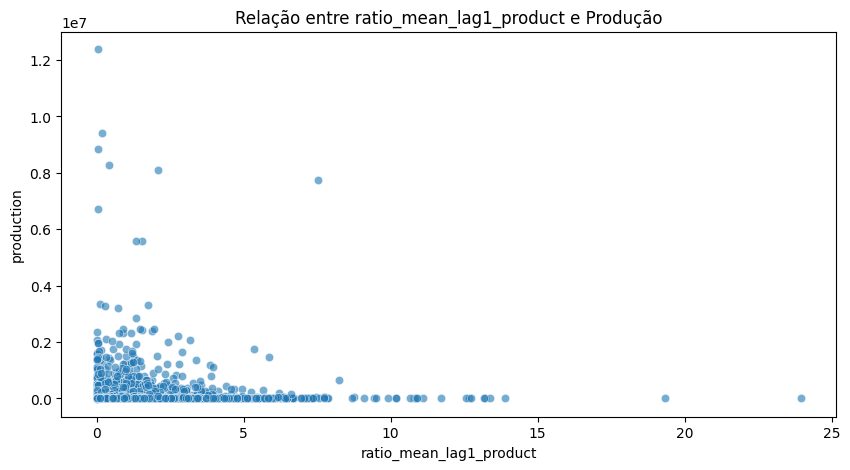

Correlação de Pearson entre ratio_mean_lag1_product e Produção: 0.0497 (p-value: 0.0000)



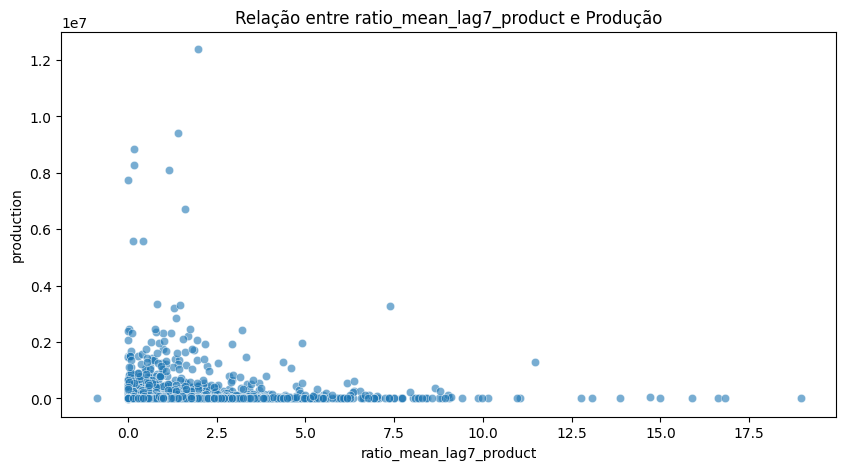

Correlação de Pearson entre ratio_mean_lag7_product e Produção: 0.0367 (p-value: 0.0000)



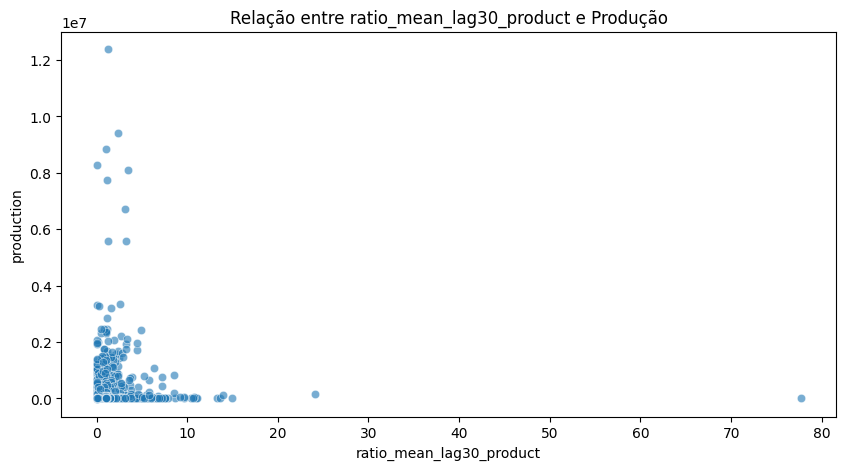

Correlação de Pearson entre ratio_mean_lag30_product e Produção: 0.0499 (p-value: 0.0000)



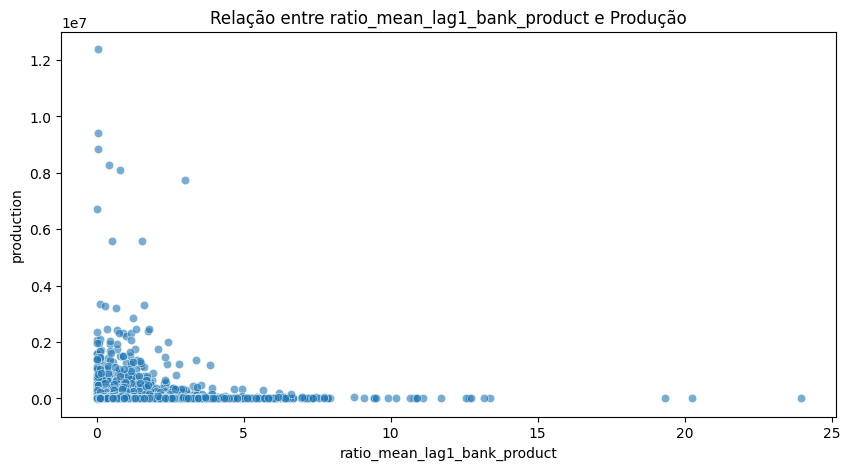

Correlação de Pearson entre ratio_mean_lag1_bank_product e Produção: 0.0126 (p-value: 0.0002)



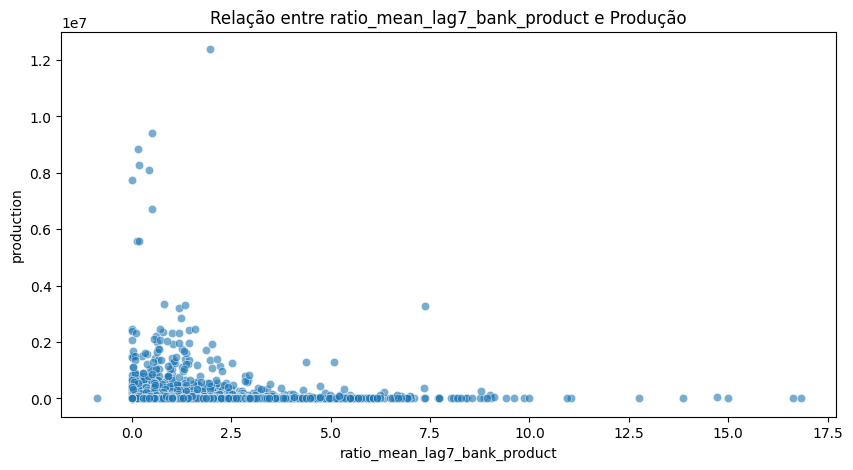

Correlação de Pearson entre ratio_mean_lag7_bank_product e Produção: 0.0048 (p-value: 0.1568)



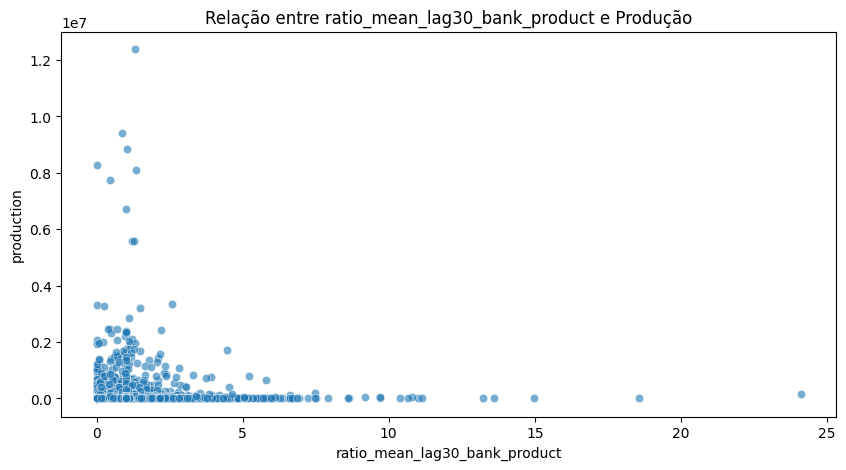

Correlação de Pearson entre ratio_mean_lag30_bank_product e Produção: 0.0054 (p-value: 0.1132)



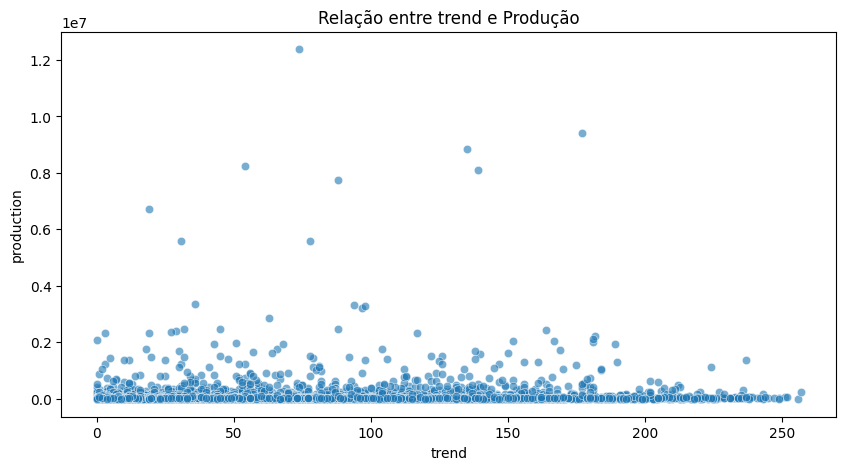

Correlação de Pearson entre trend e Produção: 0.0992 (p-value: 0.0000)



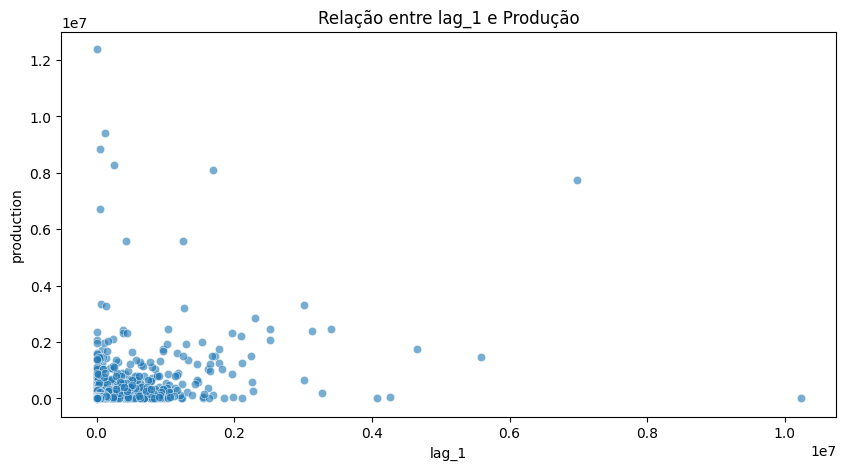

Correlação de Pearson entre lag_1 e Produção: 0.4201 (p-value: 0.0000)



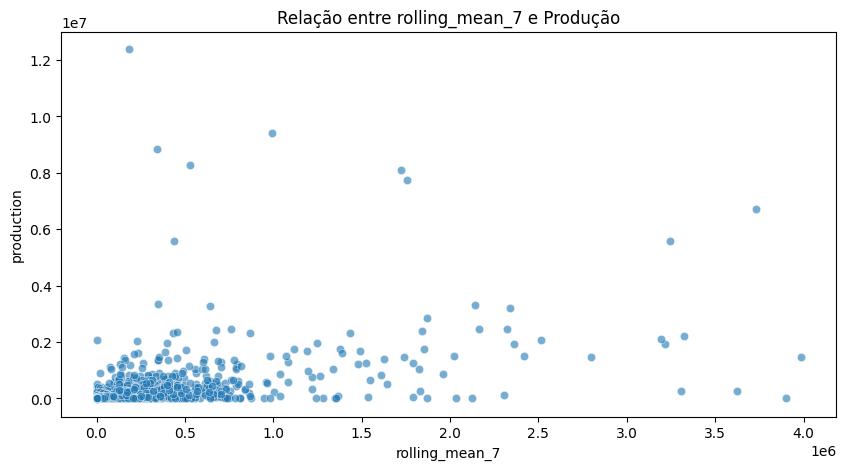

Correlação de Pearson entre rolling_mean_7 e Produção: 0.5620 (p-value: 0.0000)



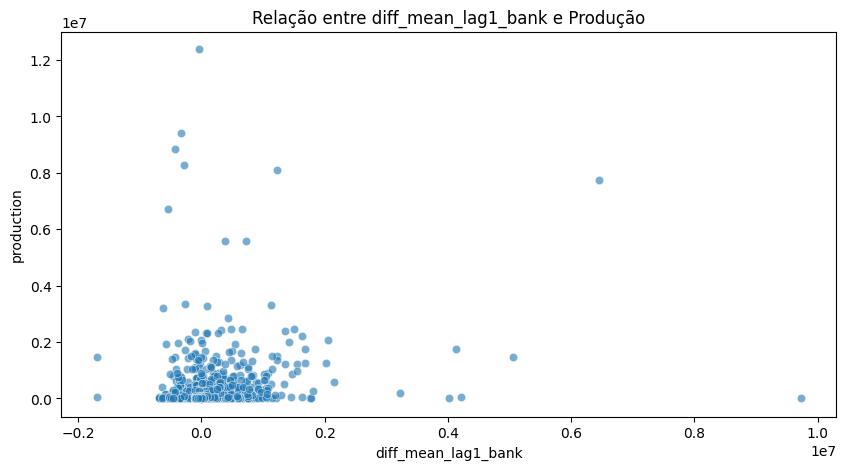

Correlação de Pearson entre diff_mean_lag1_bank e Produção: 0.2641 (p-value: 0.0000)



In [11]:
analyze_numerical_features(df)

# Salvando Bases Processadas

In [15]:
date_split = df['date'].min() + (df['date'].max() - df['date'].min()) * 0.7
df_test = df[df['date']>=date_split]
df_train = df[df['date']<date_split]

df_train.to_csv('C:\\Users\\joaov\\OneDrive\\Área de Trabalho\\Python\\lev-challenge\\data\\processed\\train_dataset.csv', index=False)
df_test.to_csv('C:\\Users\\joaov\\OneDrive\\Área de Trabalho\\Python\\lev-challenge\\data\\processed\\test_dataset.csv', index=False)